<a href="https://colab.research.google.com/github/otorregrosa/LinearAlg/blob/main/Week%2010/LinAlg_Midterms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Linear Algebra (CpE210A)

<h3>Midterms Project

Coded and submitted by:<br>
<i>Torregrosa, Othello C.<br>
    201820005 <br>
   58051 </i>

Directions
This Jupyter Notebook will serve as your base code for your Midterm Project. You must further format and provide complete discussion on the given topic. 
- Provide all necessary explanations for specific code blocks. 
- Provide illustrations for key results.
- Observe clean code (intuitive variable names, proper commenting, proper code spacing)
- Provide a summary discussion at the end

Failure to use this format or failure to update the document will be given a deduction equivalent to 50% of the original score. 

### Case

Bebang is back to consult you about her business. Furthering her data analytics initiative she asks you for help to compute some relevant data. Now she is asking you to compute and visualize her sales and costs for the past year. She has given you the datasets attached to her request.

### Problem

State and explain Bebang's problem here and provide the deliverables.

Bebang wants to know which flavors of donuts are profitable compared to the others to increase her profits, and reduce her costs. She would also like to know how she could improve her sales whether through marketing and/or advertising.

The deliverables are the following:
1. What are the monthly revenues, costs, and profits?
2. How much profit did Bebang get for each flavor? And identify which are the top 3 and bottom 3 flavors?
3. Is there anything she could improve on marketing or advertising?



# Proof of Concept

Now that you have a grasp on the requirements we need to start with making a program to prove that her problem is solvable. As a Linear Algebra student, we will be focusin on applying vector operations to meet her needs. First, we need to import her data. We will use the `pandas` library for this. For more information you can look into their documentation [here](https://pandas.pydata.org/).

In [66]:
from google.colab import files
import io
upload = files.upload()

Saving bebangsalesalter - Sheet1.csv to bebangsalesalter - Sheet1.csv


In [45]:

import pandas as pd

file_prices = "bebang prices.csv"
file_sales = "bebang sales.csv"

df_prices = pd.read_csv(file_prices, index_col=0)
df_sales = pd.read_csv(file_sales)


## Let's check what's in df_prices
df_prices

,red velvet,oreo,sugar glazed,almond honey,matcha,strawberry cream,brown sugar boba,furits and nuts,dark chocolate,chocolate and orange,choco mint,choco butter naught
price per piece,35,25,20,35,50,40,40,45,30,40,45,45
cost per piece,25,15,10,20,35,31,30,25,15,25,32,31


In [46]:
## Let's check the sales dataframe
df_sales

,flavor,january,february,march,april,may,june,july,august,september,october,november,december
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231


## Part 1: Monthly Sales

In [47]:
import numpy as np
### Vectorizing the data

sales_mat = np.array(df_sales.set_index('flavor'))
prices_mat = np.array(df_prices)[0] ## reshape this vector to the appropriate size
costs_mat = np.array(df_prices)[1] ## reshape this vector to the appropriate size
prices_mat = prices_mat.reshape(12,1)
costs_mat = costs_mat.reshape(12,1)
## Do not alter these lines
print(sales_mat.shape)
print(prices_mat.shape)
print(costs_mat.shape)
# Expected Output
# (12, 12)
# (12, 1)
# (12, 1)

(12, 12)
(12, 1)
(12, 1)


#### Formulas

Take note that the fomula for revenue is: <br>
$revenue = sales * price $ <br>
In this case, think that revenue, sales, and price are vectors instead of individual values <br>
The formula of cost per item sold is: <br>
$cost_{sold} = sales * cost$ <br>
The formula for profit is: <br>
$profit = revenue - cost_{sold}$ <br>
Solving for the monthly profit will be the sum of all profits made on that month.

In [48]:
#Create a function that *returns* and prints the monthly sales and profit for each month 
def monthly_sales(price, cost, sales):
    monthly_revenue = sum(sales*price)
    monthly_costs = sum(sales*cost)
    monthly_profits =  (monthly_revenue - monthly_costs)
    return monthly_revenue.flatten(), monthly_costs.flatten(), monthly_profits.flatten()

In [49]:
### Do not alter this cell
month_rev, month_cost, month_profit = monthly_sales(prices_mat, costs_mat, sales_mat)
### print the values
print("Monthly Revenue(January-December): \n", month_rev)
print("\n")
print("Yearly Revenue: \n", sum(month_rev))
print("\n")
print("Yearly Cost: \n", sum(month_cost))
print("\n")
print("Monthly Profit(January-December): \n", month_profit)
print("\n")
print("Yearly Profit: \n", sum(month_profit))

Monthly Revenue(January-December): 
 [236825 175530 159045  30335 150085  16735  17970  16995  14960  21590
 213655 347365]


Yearly Revenue: 
 1401090


Yearly Cost: 
 923262


Monthly Profit(January-December): 
 [ 79371  59208  53850  10001  52824   5527   5598   5498   5034   7213
  76548 117156]


Yearly Profit: 
 477828


## Part 2: Flavor Sales

In [50]:
#Create a function that *returns* and prints the flavor profits for the whole year 
def flavor_sales(price, cost, sales):
    flavor_revenue = (sales*price)
    flavor_costs = (sales*cost)
    flavor_profits = (flavor_revenue - flavor_costs)  
    return flavor_profits.flatten()



In [30]:
### Do not alter this cell
flavor_profit = flavor_sales(prices_mat, costs_mat, sales_mat)
### print the values
flavor1 = []
flavor2 = []
flavor3 = []
flavor4 = []
flavor5 = []
flavor6 = []
flavor7 = []
flavor8 = []
flavor9 = []
flavor10 = []
flavor11 = []
flavor12 = []

for x in flavor_profit:
    if len(flavor1)<=11:
        flavor1.append(x)
    elif len(flavor2)<=11:
        flavor2.append(x)
    elif len(flavor3)<=11:
        flavor3.append(x)
    elif len(flavor4)<=11:
        flavor4.append(x)
    elif len(flavor5)<=11:
        flavor5.append(x)
    elif len(flavor6)<=11:
        flavor6.append(x)
    elif len(flavor7)<=11:
        flavor7.append(x)
    elif len(flavor8)<=11:
        flavor8.append(x)
    elif len(flavor9)<=11:
        flavor9.append(x)
    elif len(flavor10)<=11:
        flavor10.append(x)
    elif len(flavor11)<=11:
        flavor11.append(x)
    elif len(flavor12)<=11:
        flavor12.append(x)

flavor_profits = np.array([sum(flavor1),sum(flavor2),sum(flavor3),sum(flavor4),sum(flavor5),sum(flavor6),sum(flavor7),sum(flavor8),sum(flavor9),
                          sum(flavor10),sum(flavor11),sum(flavor12)])
  
print("The row represents the flavors while the column represents the months \n")
print("Profits of flavors per month: \n", flavor_profit)
print("\n")
print("Flavors profits per year: \n", flavor_profits)

The row represents the flavors while the column represents the months 

Profits of flavors per month: 
 [ 7810  5240  3640  1570  8940   560   890   410   230   780  2310  8990
  2100  3240  3440   320  1230    10    30     0    10    60  3120  5480
  5990  6740  8540   140  4670   780   360   480   750   980  7810 16020
  1860  1680  1710   345  2970   180   480   615   345   540  4500  8490
  9675  7470 13275  1470  2655  1470   645  1440   390  1065  8235 13455
  1890  3348  3321   702  1467   234   405   198   486   369  1863  4104
  9810  3800  1540   140  1470   150   980   330   230   360  5520  6330
  9560  9240  7080   980  1780     0    20     0    20   160  6700  4280
  8970  3045   540  1440 11835    60    75     0   120     0 11835  6870
  4860  1845   720   480   975  1110  1170   675  1335  1500  9480  3465
  5954  5356  1014  1014  1014    91    39   104    26    13  4199  7332
 10892  8204  9030  1400 13818   882   504  1246  1092  1386 10976 32340]


Flavors profits p

In [60]:
flavors = np.array(pd.read_csv("bebang sales.csv", usecols=[0]))
fl_list = flavors.tolist()
flprofit_list = flavor_profits.tolist()
matched_list = list(zip(flprofit_list, fl_list))
### identify the best-selling and least-selling flavors. You can use np.sort() or np.argmax() for this.
best_3_flavors = [x[1] for x in sorted(matched_list, reverse=True)]
worst_3_flavors = [x[1] for x in sorted(matched_list)]

print("Best Selling Flavors: \n", best_3_flavors[0:3])
print("\n")
print("Worst Selling Flavors: \n", worst_3_flavors[0:3])

Best Selling Flavors: 
 [['choco butter naught'], ['matcha'], ['sugar glazed']]


Worst Selling Flavors: 
 [['strawberry cream'], ['oreo'], ['almond honey']]


## Part 3: Visualizing the Data (Optional for +40%)
You can try to visualize the data in the most comprehensible chart that you can use.

In [63]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

#### Entire Dataset

Text(0.5, 1.0, 'Sales of Each Flavor')

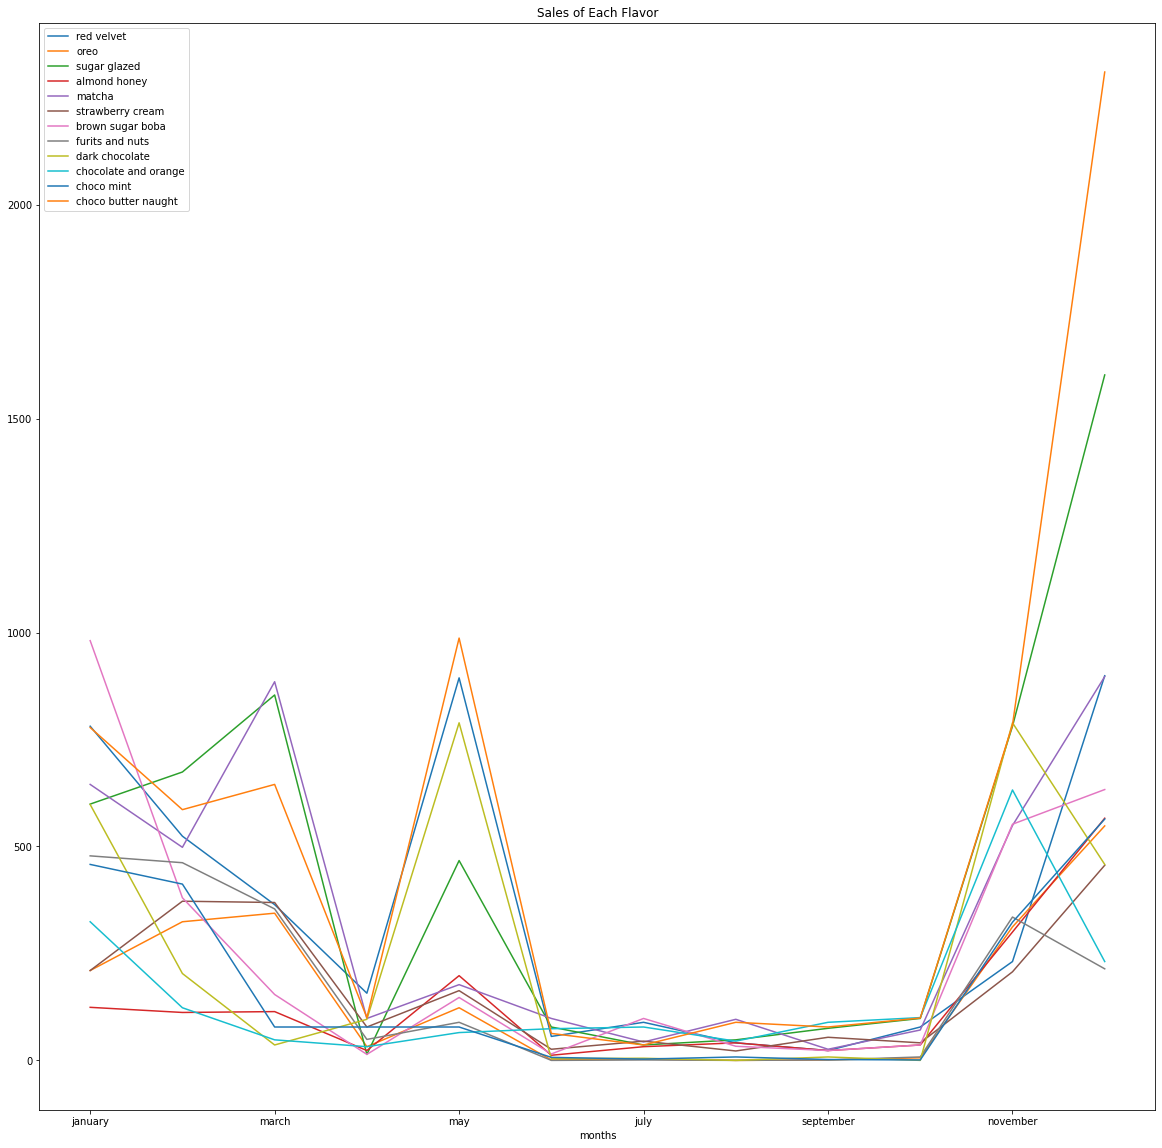

In [67]:
df_sales_table = pd.read_csv("bebangsalesalter - Sheet1.csv")
df_sales_table.plot(x="months", figsize=(20,20))
plt.title('Sales of Each Flavor')

#### Monthly Sales

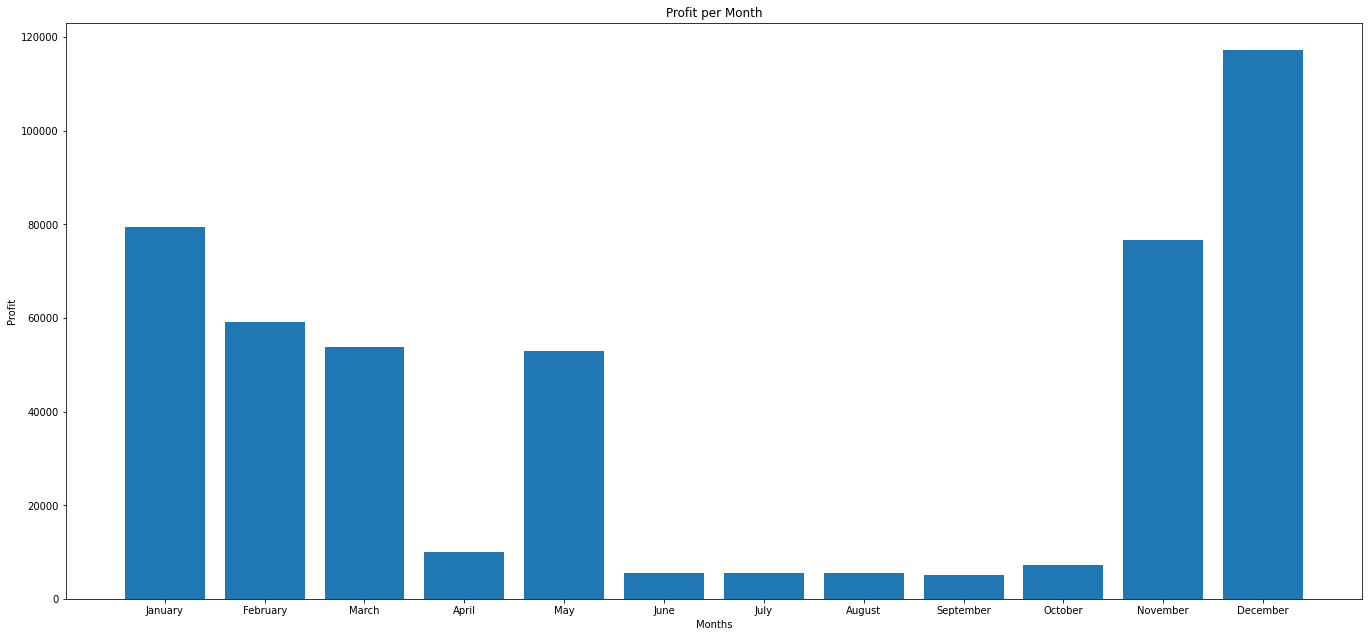

In [94]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,2])
ax.set_ylabel('Profit')
ax.set_xlabel('Months')
ax.set_title('Profit per Month')
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Profits = month_profit
ax.bar(months, Profits)
plt.show()

#### Flavor Sales

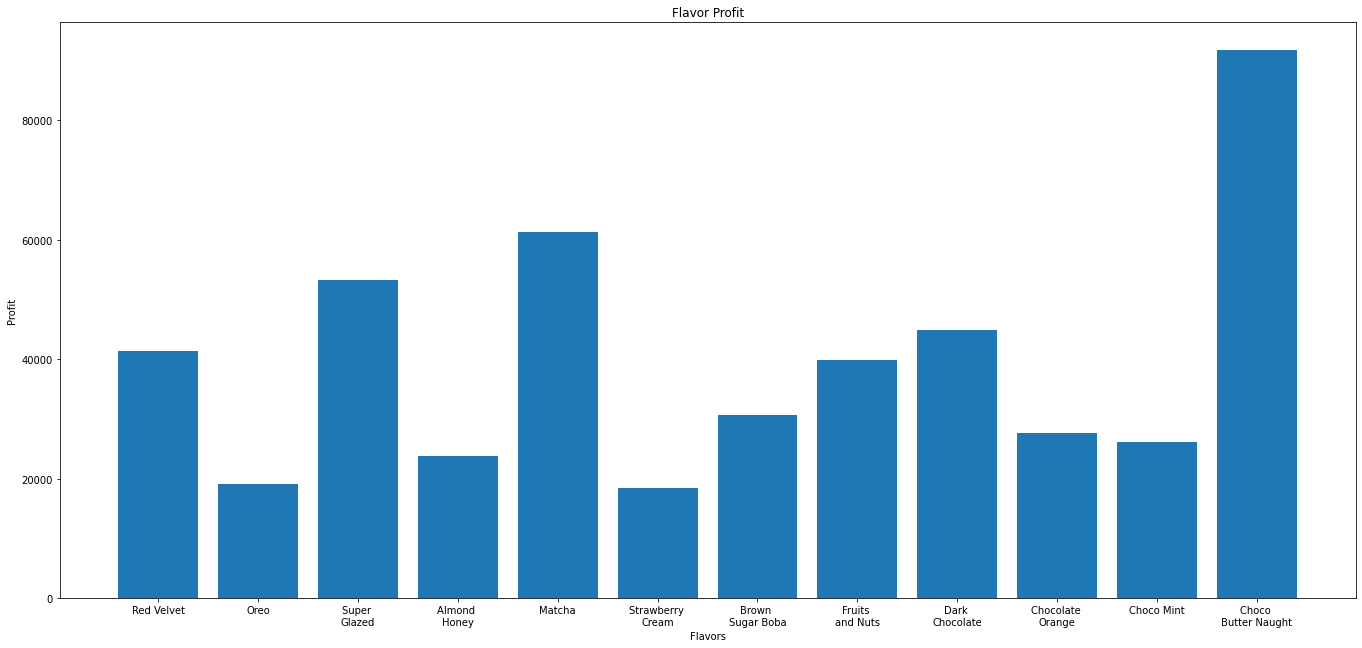

In [99]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,2])
ax.set_ylabel('Profit')
ax.set_xlabel('Flavors')
ax.set_title('Flavor Profit')
flavors = ['Red Velvet', 'Oreo', 'Super \nGlazed', 'Almond \nHoney', 'Matcha', 'Strawberry \nCream', 'Brown \nSugar Boba', 
           'Fruits \nand Nuts', 'Dark \nChocolate', 'Chocolate \nOrange', 'Choco Mint', 'Choco \nButter Naught']
Profits = flavor_profits
ax.bar(flavors, Profits)
plt.show()

## Part 4: Business Recommendation and Conclusion
Present the findings of your data analysis and provide recommendations

My buisness recommendation to Bebang after computing and plotting the given data is that she should increase her stock of her three best flavors which are choco butter naught, matcha, and super glazed while limit her stock of strawberry cream, oreo and almond honey. November until January she should be able to profit a lot while February, March and May is where she should try increase more of her profits, while during April and June until October she should try limiting her stock to avoid money splunges as according to the data most people are close to not ordering anything at all. In order to improve on the marketing or advertising side she could do surveys that will tell her which of the flavors her customers actually prefer and it could promote her shop as something to look forward to because she is actually trying to improve it. In advertising she could commision local artists to create logos for her shop or conduct a sales promotion during her peak months to maximize profits. 